# Ảnh mờ sau khi dùng lọc thông thấp Ideal

<>:40: SyntaxWarning: invalid escape sequence '\I'
<>:40: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Home\AppData\Local\Temp\ipykernel_15668\4188843738.py:40: SyntaxWarning: invalid escape sequence '\I'
  input_path = "C:\ImageProcessing\Doan-xulyanh\img\moon.jpg"  # anh dau vao


Da mo file: C:\ImageProcessing\Doan-xulyanh\img\moon.jpg (shape=(1386, 736))
Da luu ket qua: output_moon_ideal_lp.png


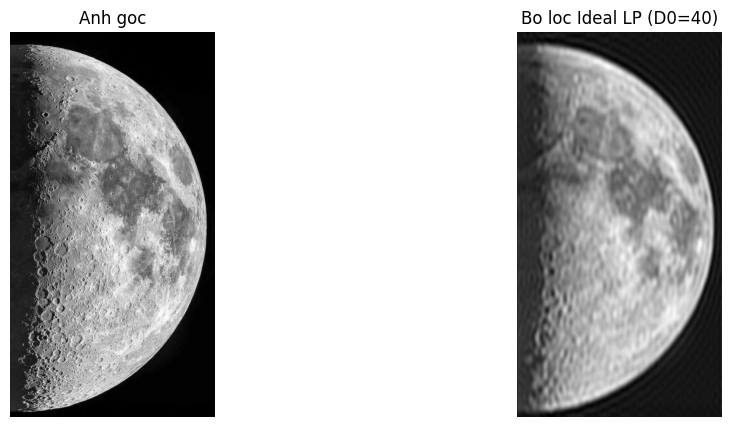

In [ ]:
# tieng viet khong dau
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def load_image_grayscale(path):
    """Doc anh muc xam tu duong dan."""
    if os.path.exists(path):
        img = Image.open(path).convert('L')
        arr = np.array(img).astype(np.float32)
        print(f"Da mo file: {path} (shape={arr.shape})")
        return arr
    else:
        raise FileNotFoundError(f"Khong tim thay file: {path}")

def ideal_lowpass_filter(image, D0):
    """Bo loc thong thap iDeal trong mien tan so."""
    M, N = image.shape
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)

    u = np.arange(0, M)
    v = np.arange(0, N)
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt((U - M//2)**2 + (V - N//2)**2)
    H = (D <= D0).astype(float)

    Gshift = Fshift * H
    G = np.fft.ifftshift(Gshift)
    img_back = np.fft.ifft2(G)
    img_back = np.real(img_back)

    # chuan hoa 0-255
    img_back = img_back - img_back.min()
    img_back = img_back / img_back.max() * 255.0
    return img_back

# --------- tham so ----------
input_path = "C:\ImageProcessing\Doan-xulyanh\img\moon.jpg"  # anh dau vao
D0 = 40                      # ban kinh cat (cang lon cang it mo)
# ----------------------------

img = load_image_grayscale(input_path)
result = ideal_lowpass_filter(img, D0)

out_path = "output_moon_ideal_lp.png"
Image.fromarray(np.clip(result, 0, 255).astype(np.uint8)).save(out_path)
print(f"Da luu ket qua: {out_path}")

# hien thi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Anh goc")
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title(f"Bo loc Ideal LP (D0={D0})")
plt.axis('off')
plt.imshow(result, cmap='gray')
plt.show()
